# Twitter üzerinde Duygu Analizi
Bensu GAYRET - Kasım 2022

### Referanslar
- [How to Scrape Tweets From Twitter](https://towardsdatascience.com/how-to-scrape-tweets-from-twitter-59287e20f0f1)
- [Savaş Yıldırım - Bert-base Turkish Sentiment Model](https://huggingface.co/savasy/bert-base-turkish-sentiment-cased)
- [Twitter üzerinde Duygu Analizi-Yunus Emre Gündoğmuş](https://github.com/kaveai/veribilimiyazokulu/blob/main/Python%20ve%20Veri%20Bilimi%20%C3%96rnekleri/Twitter%20Verisi%20ile%20Duygu%20Analizi.ipynb)

# Kütüphaneler

In [74]:
import pandas as pd
import texthero as hero 
from texthero import preprocessing
from texthero import stopwords
import seaborn as sbn
import numpy as np
import matplotlib.pyplot as plt
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from tqdm import tqdm
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# TWINT - Twitter Intelligence Tool

# Command prompt'da çalıştırılacak

## Aranması istenen kelime - hangi tarihten beri - hangi formatta

!twint -s cici - since 2022–10–30 -o Film.csv - csv

# Veriyi Çekme ve Temizleme

In [52]:
#csv to xlsx 
DataFrame= pd.read_excel("Film.xlsx")
TurkceTweetlerDF=DataFrame.language=="tr" #sadece türkçe tweetleri alıyoruz
DilTurk=DataFrame[TurkceTweetlerDF]
tweets = pd.DataFrame(DilTurk, columns=["date","time",'id','Text'])
tweets.head(20)

,date,time,id,Text
2,2022-11-08,12:02:05,1.589906e+18,@FatmaYa51870342 @konyaspor Cici kız sen futbo...
3,2022-11-08,11:59:22,1.589905e+18,@OktemSerhan @turgaydemirr İncindinmi zorunami...
4,2022-11-08,11:58:53,1.589905e+18,@ozse93 @turgaydemirr İncindinmi zorunami gitt...
8,2022-11-08,11:51:21,1.589903e+18,"""Cici"" Filmi ve “I am a Stalker”ın Hissettirdi..."
12,2022-11-08,11:48:44,1.589903e+18,"İşine gelince cici, işine gelmeyince tü kaka! ..."
18,2022-11-08,11:44:04,1.589902e+18,Şeytan cici oldu!
19,2022-11-08,11:44:03,1.589902e+18,@zeycageternity @beehaber Gigi (Cici) instagra...
23,2022-11-08,11:43:22,1.589901e+18,@haskologlu Tabe tabe. Siz yapınca cici çocuk....
24,2022-11-08,11:43:21,1.589901e+18,@cici_199x_ @wintef bner kan mamci 🥺
26,2022-11-08,11:42:21,1.589901e+18,@cici_199x_ Ngiler mamci?


In [53]:
custom_pipeline = [preprocessing.fillna,
                 preprocessing.lowercase,
                 preprocessing.remove_whitespace,
                 preprocessing.remove_stopwords,
                 preprocessing.remove_diacritics,
                 preprocessing.remove_punctuation,
                 preprocessing.remove_digits,
                 preprocessing.remove_html_tags,
                 preprocessing.remove_urls
                  ]

tweets['c_tweet'] = hero.clean(tweets['Text'], custom_pipeline)


default_stopwords = stopwords.DEFAULT
custom_stopwords = default_stopwords.union(set(["acaba","ama","mi","nin","co","kız","ancak","yi","arada","bana","belki","ben","benden",
                         "beni","bence","benim","beri","bile","bi","bin","bir","biraz","biri","birkez",
                         "biz","bize","bizden","bizim","böyle","bu","buna","bunda","bundan",
                         "bunlar","bunu","bunun","burada","çok","da","daha","dahi","de","değil","defa",
                         "diye","doksan","edecek","eden","ederek","edilecek","ediliyor",
                         "ediyor","elli","en","etmesi","etti","fakat","gibi","halen","hangi",
                         "hatta","hem","hep","hepsi","her","herhangi","herkesin","için","iki",
                         "ile","ilgili","ise","itibaren","itibariyle","kadar","kendi",
                         "kendilerine","kendini","kendisi","kendisine","kez","ki","kim",
                         "kimden","kime","kimi","kimse","milyar","milyon","mu","ne",
                         "neden","nedenle","nerde","nerede","nereye","niye","olan",
                       "olarak","oldu","olduğu","olduğunu","olmuş","olmak","olmayan","olmaz","olsa","olsun","icin",
                         "olup","olur","olursa","oluyor","on","ona","ondan","onlar",
                         "onlardan","onu","onun","oysa","öyle","pek","sadece","sanki","sekiz","bu","den",
                         "sen","senden","seni","senin","siz","sizden","sizi","sizin","sonra","şey","tam","tek","tüm",
                         "var","var.","ve","veya","ya","yani","yapacak","yapmak","yapılmış","yok","yok.","yine","yoksa",
                         "zaten",".",",",":",";","?","!","i","o"]))
tweets['clean_tweet'] =hero.remove_stopwords(tweets['c_tweet'], custom_stopwords)

# WORD CLOUD

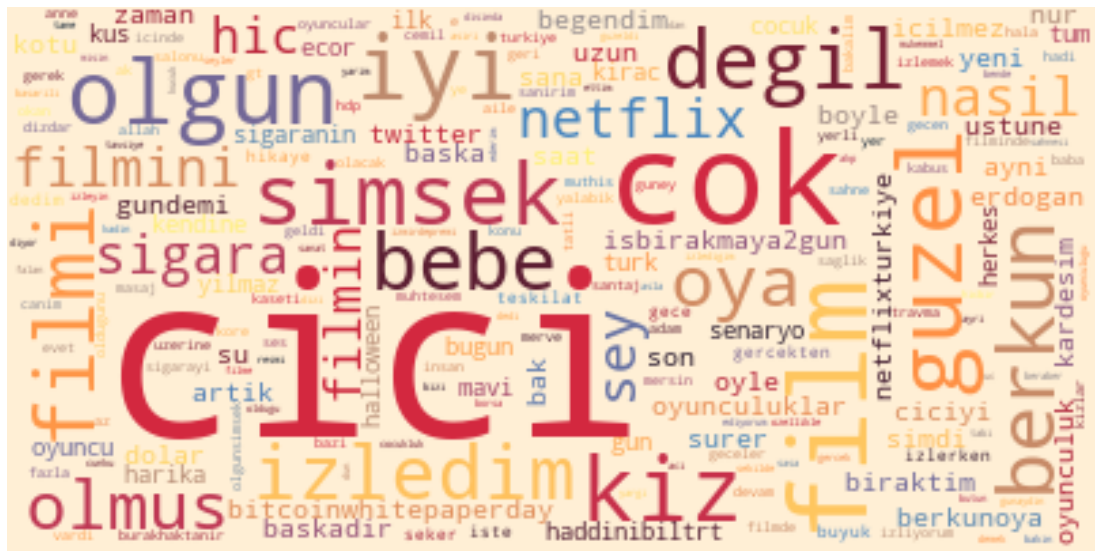

In [79]:
hero.named_entities(tweets["clean_tweet"])

NUM_TOP_WORDS = 30
hero.top_words(tweets["clean_tweet"])[:NUM_TOP_WORDS]
          
hero.wordcloud(tweets["clean_tweet"])
# Save the image in the img folder:
plt.savefig('WORDCLOUD.png')

# Eğitilmiş BERT Modeli Kullanarak Duygu Analizinin Yapılması

In [56]:
# Eğitilmiş Ağırlıkların Yüklenmesi
model = AutoModelForSequenceClassification.from_pretrained("savasy/bert-base-turkish-sentiment-cased")
tokenizer = AutoTokenizer.from_pretrained("savasy/bert-base-turkish-sentiment-cased")

sentiment_analysis_pipeline= pipeline("sentiment-analysis", tokenizer=tokenizer, model=model)

In [57]:
sentiment_analysis_pipeline("Çok güzel bir film ")

[{'label': 'positive', 'score': 0.9907761216163635}]

In [58]:
sentiment_analysis_pipeline("Çok da güzel bir film değil")

[{'label': 'negative', 'score': 0.9986237287521362}]

In [63]:
sentiment_result=[]
for text in tqdm(tweets.Text):
    result = sentiment_analysis_pipeline(text)[0]
    sentiment_result.append(result)

100%|██████████████████████████████████████████████████████████████████████████████| 4656/4656 [05:12<00:00, 14.88it/s]


In [64]:
tweets.head()

,date,time,id,Text,c_tweet,clean_tweet
2,2022-11-08,12:02:05,1.589906e+18,@FatmaYa51870342 @konyaspor Cici kız sen futbo...,fatmaya51870342 konyaspor cici kiz sen futbo...,fatmaya51870342 konyaspor cici kiz futbolda...
3,2022-11-08,11:59:22,1.589905e+18,@OktemSerhan @turgaydemirr İncindinmi zorunami...,oktemserhan turgaydemirr ncindinmi zorunami ...,oktemserhan turgaydemirr ncindinmi zorunami ...
4,2022-11-08,11:58:53,1.589905e+18,@ozse93 @turgaydemirr İncindinmi zorunami gitt...,ozse93 turgaydemirr ncindinmi zorunami gitti...,ozse93 turgaydemirr ncindinmi zorunami gitti...
8,2022-11-08,11:51:21,1.589903e+18,"""Cici"" Filmi ve “I am a Stalker”ın Hissettirdi...",cici filmi stalkerin hissettirdikleri ...,cici filmi stalkerin hissettirdikleri ...
12,2022-11-08,11:48:44,1.589903e+18,"İşine gelince cici, işine gelmeyince tü kaka! ...",sine gelince cici isine gelmeyince tu kaka t...,sine gelince cici isine gelmeyince tu kaka t...


In [67]:
sentiment_result = pd.DataFrame(sentiment_result)
tweets = pd.concat([tweets, sentiment_result],axis=1)
tweets.label = tweets.label.map({'positive':1,'negative':0})
tweets.to_excel("CiciFilm_PN.xlsx") #yeni tabloyu excele yazdır

In [68]:
tweets.head()

,date,time,id,Text,c_tweet,clean_tweet,label,score
2,2022-11-08,12:02:05,1.589906e+18,@FatmaYa51870342 @konyaspor Cici kız sen futbo...,fatmaya51870342 konyaspor cici kiz sen futbo...,fatmaya51870342 konyaspor cici kiz futbolda...,0.0,0.936291
3,2022-11-08,11:59:22,1.589905e+18,@OktemSerhan @turgaydemirr İncindinmi zorunami...,oktemserhan turgaydemirr ncindinmi zorunami ...,oktemserhan turgaydemirr ncindinmi zorunami ...,1.0,0.822471
4,2022-11-08,11:58:53,1.589905e+18,@ozse93 @turgaydemirr İncindinmi zorunami gitt...,ozse93 turgaydemirr ncindinmi zorunami gitti...,ozse93 turgaydemirr ncindinmi zorunami gitti...,0.0,0.999220
8,2022-11-08,11:51:21,1.589903e+18,"""Cici"" Filmi ve “I am a Stalker”ın Hissettirdi...",cici filmi stalkerin hissettirdikleri ...,cici filmi stalkerin hissettirdikleri ...,1.0,0.976353
12,2022-11-08,11:48:44,1.589903e+18,"İşine gelince cici, işine gelmeyince tü kaka! ...",sine gelince cici isine gelmeyince tu kaka t...,sine gelince cici isine gelmeyince tu kaka t...,1.0,0.937856


# Positif ve Negatif Yorumları Tabloda Gösterelim

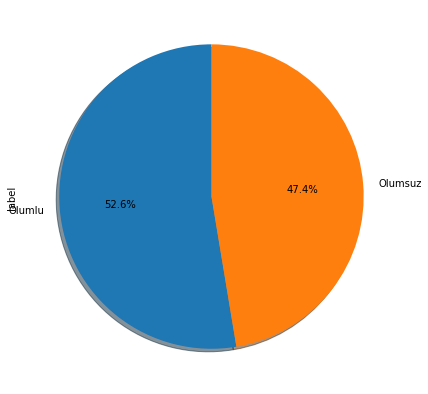

In [69]:
analiz=tweets.label.map({1:'Olumlu',0:'Olumsuz'}).value_counts()
plot = analiz.plot.pie(subplots=True, figsize=(30, 7),autopct='%1.1f%%',
        shadow=True, startangle=90)
# Save the image in the img folder:
plt.savefig('analiz.png')